$\textbf{Easy geothermal energy production calculations, Based on lecture 1-flow DENIS VOSKOV}$

In [27]:
# Well PRC_7 [100,150]
# 1 PJ = 1e12 kJ
from math import pi
import numpy as np
import matplotlib.pyplot as plt

day2sec = 86400
prod_top = 1950  #[m] 
prod_bottom = 2050#[m] 

# PARAMETERS
h = prod_bottom-prod_top # Reservoir height [m]
k = 400.37e-15                                               # Reservoir Permeability [mD]
phi = 0.27                                                # Porosity from log
T_inj = 15                                                # Injection tempareture [C] 
T_ini = 346.56 - 273 # Reservoir temperature [C] 
rho_w = 1230          # Brine density [kg/m3]
rho_r = 2197          # Reservoir denisity from log [kg/m3]
C_w = 4.2             # thermal capacity Brine [kJ/kg/C]
C_r = 0.8532          # thermal capacity rock [kJ/kg/C]

mu = 8.9e-4           # Brine viscosity
rw = 0.15             # well radius [m]
l = 800              # well seperation distance [m]
nu = 0.4              # Pump efficiency [.]


# Choose either energy wanted per year or choose rate per day.
#energy_per_year = 0.1 * 1e15 # Energy wanted PJ to J
Q = 200  # Rate m3/day


dt = 365 

#Q =  energy_per_year /  ( rho_w * C_w * (T_ini-T_inj) * 1e3) / dt      # well rate m3/day

E = rho_w * C_w * (T_ini-T_inj) * Q * dt  #energy production kJ/year


WI = 2 * np.pi * k * h / (mu* np.log (l / (2 * rw)))  # Well index 

dp = Q / WI /day2sec   # pressure drop in kPa

A = h *l / 2  # m2, assumption: the area is divided in two

v = rho_w* C_w * Q / (rho_r * C_r * (1 - phi) * A ) # velocity m/day

lt = l / v  /365                       # Lifetime in years

Ep = Q * dp / day2sec /  nu / 1000     # pumpimg energy in KJ/sec

convert = day2sec * 365 * 1e-12 # KJ/sec to PJ/year


print('   Res Temp = ' + str(T_ini)  + ' degree C')
print('   Velocity = ' + str(v)  + ' m/day')
print('   Lifetime = ' + str(lt) + ' years')
print('       Rate = ' + str(Q)  + ' m3/day')
print('Pump energy = ' + str(Ep*convert) + ' PJ')
print('Energy geoth = ' + str(E*1e-12) + ' PJ/year')


   Res Temp = 73.56 degree C
   Velocity = 0.018876463922394504 m/day
   Lifetime = 116.11183275261322 years
       Rate = 200 m3/day
Pump energy = 1.179035321589145e-05 PJ
Energy geoth = 0.022084030080000004 PJ/year


In [22]:
# Plotting the equations with different parameters:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

def lifetime(l, rho_w, C_w, Q, rho_r, C_r, phi, A):
    
    WI = 2 * np.pi * k * h / (mu* np.log (l / (2 * rw)))  # Well index 

    dp = Q / WI /day2sec   # pressure drop in kPa

    A = h *l / 2  # m2, assumption: the area is divided in two

    v = rho_w* C_w * Q / (rho_r * C_r * (1 - phi) * A ) # velocity m/day

    lt = l / v  /365                       # Lifetime in years

    Ep = Q * dp / day2sec /  nu / 1000     # pumpimg energy in KJ/sec

    return lt


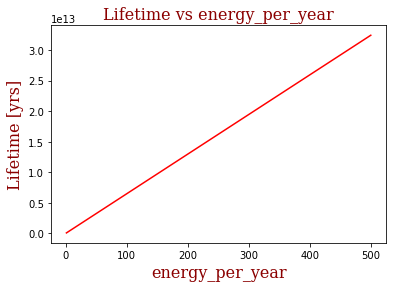

In [23]:
l = np.linspace(1,500,501) 

for i in range(len(l)):
    Lifetime = lifetime(l, rho_w, C_w, Q, rho_r, C_r, phi, A)

    
    
plt.figure()
plt.plot(l, Lifetime,'r')
plt.title('Lifetime vs speration length', fontdict=font)
plt.xlabel('distance [m]', fontdict=font)
plt.ylabel('Lifetime [yrs]', fontdict=font)
plt.show()

In [ ]:
def lifetime_2(l, rho_w, C_w, energy_per_year, rho_r, C_r, phi, A):
    
    Q =  energy_per_year /  ( rho_w * C_w * (T_ini-T_inj) * 1e3) / dt      # well rate m3/day
    
    WI = 2 * np.pi * k * h / (mu* np.log (l / (2 * rw)))  # Well index 

    dp = Q / WI /day2sec   # pressure drop in kPa

    A = h *l / 2  # m2, assumption: the area is divided in two

    v = rho_w* C_w * Q / (rho_r * C_r * (1 - phi) * A ) # velocity m/day

    lt = l / v  /365                       # Lifetime in years

    Ep = Q * dp / day2sec /  nu / 1000     # pumpimg energy in KJ/sec

    return lt


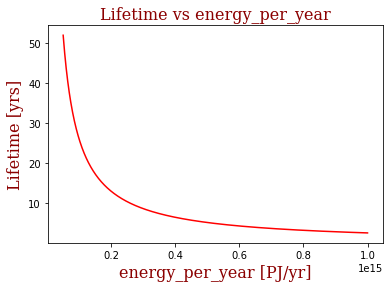

In [28]:
l = 200
energy_per_year = np.linspace(0.05 * 1e15,1 * 1e15, 1000)

for i in range(len(energy_per_year)):
    Lifetime_2 = lifetime_2(l, rho_w, C_w, energy_per_year, rho_r, C_r, phi, A)

    
    
plt.figure()
plt.plot(energy_per_year, Lifetime_2,'r')
plt.title('Lifetime vs energy_per_year', fontdict=font)
plt.xlabel('energy_per_year [PJ/yr]', fontdict=font)
plt.ylabel('Lifetime [yrs]', fontdict=font)
plt.show()